# Installation and setup

## Install necessary module

In [1]:
# All module is installed on the notebook env

## Import necessary module

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

### Enable gpu

In [3]:
# Define the fraction of GPU memory to allocate
memory_fraction = 0.75

# List available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Calculate the memory limit based on the total GPU memory and desired fraction
        total_memory = 8188  
        memory_limit = int(total_memory * memory_fraction)  

        # Restrict TensorFlow to only allocate the calculated memory on the first GPU
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=memory_limit)]
        )

        # Check the virtual devices
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)  # Virtual devices must be set before GPUs have been initialized
else:
    print("No GPU devices found.")

1 Physical GPUs, 1 Logical GPUs


In [4]:
# List available devices
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Data Preprocessing

## Data Importation

In [5]:
train_dir = r'E:\GenAI Project\data\train'
test_dir = r'E:\GenAI Project\data\test'

In [6]:
# Define parameters
batch_size = 16
img_height = 360
img_width = 360
validation_split = 0.2
seed = 1

# Load and preprocess training data with shuffling
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load and preprocess validation data without shuffling
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    shuffle=False,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load and preprocess test data without shuffling
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=False,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Print dataset information
print(f"Training dataset size: {len(train_dataset)} batches")
print(f"Validation dataset size: {len(validation_dataset)} batches")
print(f"Test dataset size: {len(test_dataset)} batches")


Found 3348 files belonging to 5 classes.
Using 2679 files for training.
Found 3348 files belonging to 5 classes.
Using 669 files for validation.
Found 941 files belonging to 5 classes.
Training dataset size: 168 batches
Validation dataset size: 42 batches
Test dataset size: 59 batches


## Data visualization

In [7]:
# Inspect the structure of train_dataset
print("Train Dataset Type:", type(train_dataset))

# Inspect the number of batches in train_dataset
num_batches = len(list(train_dataset))
print("Number of Batches in Train Dataset:", num_batches)

# Inspect the first batch in train_dataset
for images, labels in train_dataset.take(1):
    print("Type of Images:", type(images))
    print("Type of Labels:", type(labels))
    print("Shape of Images Batch:", images.shape)
    print("Shape of Labels Batch:", labels.shape)

    # Inspect the first image and label
    print("Type of First Image:", type(images[0].numpy()))
    print("Type of First Label:", type(labels[0].numpy()))
    print("First Image Shape:", images[0].numpy().shape)
    print("First Label:", labels[0].numpy())

Train Dataset Type: <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
Number of Batches in Train Dataset: 168
Type of Images: <class 'tensorflow.python.framework.ops.EagerTensor'>
Type of Labels: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape of Images Batch: (16, 360, 360, 3)
Shape of Labels Batch: (16,)
Type of First Image: <class 'numpy.ndarray'>
Type of First Label: <class 'numpy.int32'>
First Image Shape: (360, 360, 3)
First Label: 0


In [8]:
# Inspect the structure of test_dataset
print("Test Dataset Type:", type(test_dataset))

# Inspect the number of batches in test_dataset
num_batches = len(list(test_dataset))
print("Number of Batches in Test Dataset:", num_batches)

# Inspect the first batch in test_dataset
for images, labels in test_dataset.take(1):
    print("Type of Images:", type(images))
    print("Type of Labels:", type(labels))
    print("Shape of Images Batch:", images.shape)
    print("Shape of Labels Batch:", labels.shape)

    # Inspect the first image and label
    print("Type of First Image:", type(images[0].numpy()))
    print("Type of First Label:", type(labels[0].numpy()))
    print("First Image Shape:", images[0].numpy().shape)
    print("First Label:", labels[0].numpy())

Test Dataset Type: <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
Number of Batches in Test Dataset: 59
Type of Images: <class 'tensorflow.python.framework.ops.EagerTensor'>
Type of Labels: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape of Images Batch: (16, 360, 360, 3)
Shape of Labels Batch: (16,)
Type of First Image: <class 'numpy.ndarray'>
Type of First Label: <class 'numpy.int32'>
First Image Shape: (360, 360, 3)
First Label: 0


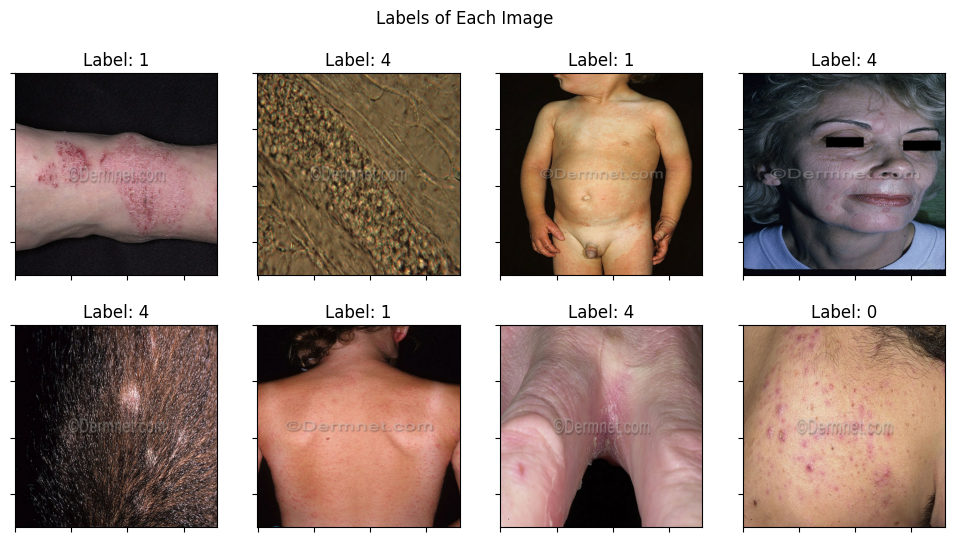

In [9]:
# Number of images to sample
num_images_to_show = 8

# Get a batch of images and labels
images, labels = next(iter(train_dataset))

# Convert TensorFlow tensors to NumPy arrays
images = images.numpy()
labels = labels.numpy()

# Get random sample indices
indices = np.random.choice(len(images), num_images_to_show, replace=False)

# Create a figure for plotting
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
plt.suptitle('Labels of Each Image')

# Plot each image and its label
for idx, (i, ax) in enumerate(zip(indices, axes.flatten())):
    img = images[i]
    label = labels[i]
    ax.imshow(img.astype(np.uint8))
    ax.set_title(f'Label: {label}')
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(False)

plt.show()


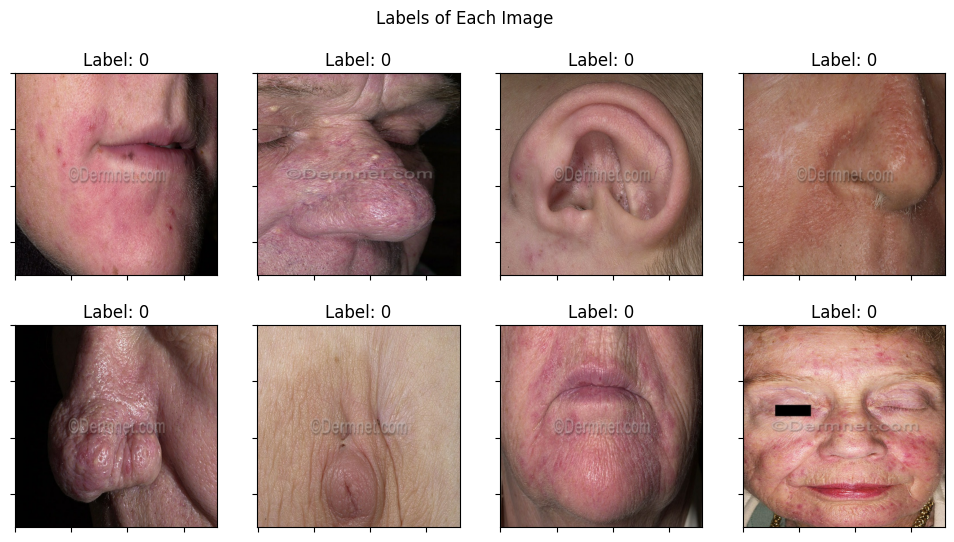

In [10]:
# Number of images to sample
num_images_to_show = 8

# Get a batch of images and labels
images, labels = next(iter(test_dataset))

# Convert TensorFlow tensors to NumPy arrays
images = images.numpy()
labels = labels.numpy()

# Get random sample indices
indices = np.random.choice(len(images), num_images_to_show, replace=False)

# Create a figure for plotting
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
plt.suptitle('Labels of Each Image')

# Plot each image and its label
for idx, (i, ax) in enumerate(zip(indices, axes.flatten())):
    img = images[i]
    label = labels[i]
    ax.imshow(img.astype(np.uint8))
    ax.set_title(f'Label: {label}')
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(False)

plt.show()


## Data normalization

In [11]:
# Normalize training and test datasets
scaled_train_dataset = train_dataset.map(lambda x, y: (x/255, y))
scaled_validation_dataset = validation_dataset.map(lambda x, y: (x/255, y))
scaled_test_dataset = test_dataset.map(lambda x, y: (x/255, y))

# Prefetch the dataset
scaled_train_dataset = scaled_train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
scaled_validation_dataset = scaled_validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
scaled_test_dataset = scaled_test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [12]:
# Print dataset information
print(f"Scaled Training dataset size: {len(list(scaled_train_dataset))} batches")
print(f"Scaled Validation dataset size: {len(list(scaled_validation_dataset))} batches")
print(f"Scaled Test dataset size: {len(list(scaled_test_dataset))} batches")

Scaled Training dataset size: 168 batches
Scaled Validation dataset size: 42 batches
Scaled Test dataset size: 59 batches


In [13]:
# Fetch a single batch from the scaled_train_dataset
for images, labels in scaled_train_dataset.take(1):
    # Convert TensorFlow tensors to NumPy arrays
    images_np = images.numpy()

    # Find the maximum and minimum values in the entire batch
    max_value = np.max(images_np)
    min_value = np.min(images_np)

    # Find the maximum and minimum values in the first image of the batch
    single_image_max_value = np.max(images_np[0])
    single_image_min_value = np.min(images_np[0])

    # Print results
    print(f"Maximum value in the entire batch: {max_value}")
    print(f"Minimum value in the entire batch: {min_value}")
    print(f"Maximum value in the first image: {single_image_max_value}")
    print(f"Minimum value in the first image: {single_image_min_value}")

Maximum value in the entire batch: 1.0
Minimum value in the entire batch: 0.0
Maximum value in the first image: 1.0
Minimum value in the first image: 0.0


In [14]:
# Fetch a single batch from the scaled_test_dataset
for images, labels in scaled_test_dataset.take(1):
    # Convert TensorFlow tensors to NumPy arrays
    images_np = images.numpy()

    # Find the maximum and minimum values in the entire batch
    max_value = np.max(images_np)
    min_value = np.min(images_np)

    # Find the maximum and minimum values in the first image of the batch
    single_image_max_value = np.max(images_np[0])
    single_image_min_value = np.min(images_np[0])

    # Print results
    print(f"Maximum value in the entire batch: {max_value}")
    print(f"Minimum value in the entire batch: {min_value}")
    print(f"Maximum value in the first image: {single_image_max_value}")
    print(f"Minimum value in the first image: {single_image_min_value}")

Maximum value in the entire batch: 1.0
Minimum value in the entire batch: 0.0
Maximum value in the first image: 0.8998693227767944
Minimum value in the first image: 0.0003049364313483238


# Model Creation

In [19]:
# Define the log directories for each model
log_dir_model1 = 'logs/model1'
log_dir_model2 = 'logs/model2'

# Create TensorBoard callbacks
tensorboard_callback_model1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_model1)
tensorboard_callback_model2 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_model2)

# Create EarlyStopping callbacks
early_stopping_callback_model1 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping_callback_model2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

## First model

In [20]:
# Initialize the Sequential model
model1 = Sequential()

# Add an Input layer with the input shape
model1.add(Input(shape=(360, 360, 3)))

# Add layers to the model
model1.add(Conv2D(16, (3, 3), 1, activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(32, (3, 3), 1, activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(16, (3, 3), 1, activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())

model1.add(Dense(256, activation='relu'))
model1.add(Dense(5, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [21]:
# Print model summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 358, 358, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 179, 179, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 177, 177, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 86, 86, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 16)      

### Train the frist model

In [22]:
# Train the model
model1_hist = model1.fit(
    scaled_train_dataset,
    epochs=50,
    validation_data=scaled_validation_dataset,
    callbacks=[tensorboard_callback_model1, early_stopping_callback_model1]
)

# Clear session to free GPU memory
tf.keras.backend.clear_session()

Epoch 1/50
168/168 [==============================] - 12s 38ms/step - loss: 1.5467 - accuracy: 0.3856 - val_loss: 0.7813 - val_accuracy: 1.0000
Epoch 2/50
168/168 [==============================] - 6s 36ms/step - loss: 1.4189 - accuracy: 0.4155 - val_loss: 0.8227 - val_accuracy: 0.9731
Epoch 3/50
168/168 [==============================] - 6s 36ms/step - loss: 1.3021 - accuracy: 0.4610 - val_loss: 0.8296 - val_accuracy: 0.8565
Epoch 4/50
168/168 [==============================] - 9s 54ms/step - loss: 1.1621 - accuracy: 0.5304 - val_loss: 0.6982 - val_accuracy: 0.7833
Epoch 5/50
168/168 [==============================] - 9s 49ms/step - loss: 0.8784 - accuracy: 0.6543 - val_loss: 0.7100 - val_accuracy: 0.7444
Epoch 6/50
168/168 [==============================] - 8s 44ms/step - loss: 0.6169 - accuracy: 0.7723 - val_loss: 0.4847 - val_accuracy: 0.8729
Epoch 7/50
168/168 [==============================] - 9s 47ms/step - loss: 0.3908 - accuracy: 0.8541 - val_loss: 0.4365 - val_accuracy: 0.858

### Plotting the first model performance

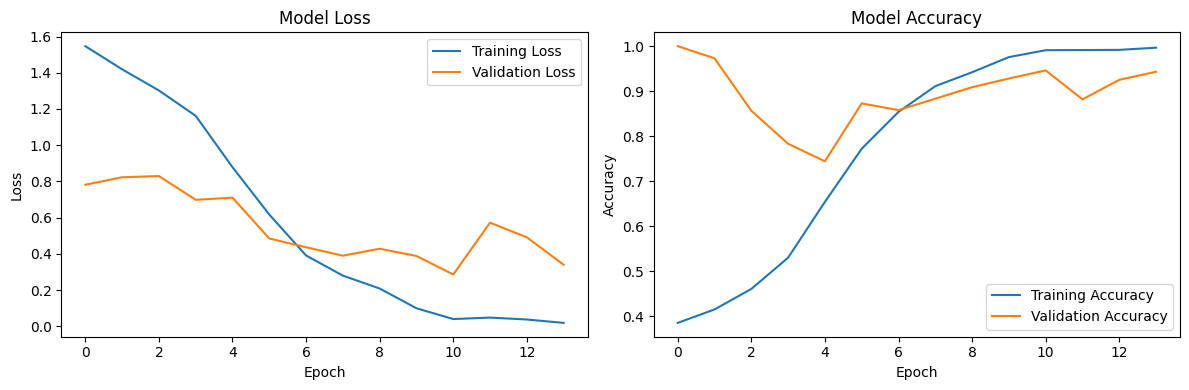

In [23]:
# Assuming model1_hist is the history object returned by model1.fit()
history1 = model1_hist.history

# Plotting the training and validation loss
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history1['loss'], label='Training Loss')
plt.plot(history1['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history1['accuracy'], label='Training Accuracy')
plt.plot(history1['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Show plots
plt.tight_layout()
plt.show()

## Second Model

In [24]:
# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(360, 360, 3))
print("Pre-trained ResNet50 model loaded.")

# Freeze the base model
base_model.trainable = False

# Add new layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(5, activation='softmax')(x)

# Create the full model
model2 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Pre-trained ResNet50 model loaded.


In [25]:
# Print model summary
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 360, 360, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 366, 366, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 180, 180, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

### Train the second model

In [26]:
# Train the model
model2_hist = model2.fit(
    scaled_train_dataset,
    epochs=50,
    validation_data=scaled_validation_dataset,
    callbacks=[tensorboard_callback_model2, early_stopping_callback_model2]
)

# Clear session to free GPU memory
tf.keras.backend.clear_session()

Epoch 1/50
168/168 [==============================] - 19s 99ms/step - loss: 1.5476 - accuracy: 0.3587 - val_loss: 0.9547 - val_accuracy: 1.0000
Epoch 2/50
168/168 [==============================] - 17s 101ms/step - loss: 1.4911 - accuracy: 0.3886 - val_loss: 0.9341 - val_accuracy: 1.0000
Epoch 3/50
168/168 [==============================] - 16s 95ms/step - loss: 1.4865 - accuracy: 0.3908 - val_loss: 0.9190 - val_accuracy: 1.0000
Epoch 4/50
168/168 [==============================] - 18s 108ms/step - loss: 1.4869 - accuracy: 0.3912 - val_loss: 0.7994 - val_accuracy: 1.0000
Epoch 5/50
168/168 [==============================] - 18s 103ms/step - loss: 1.4851 - accuracy: 0.3912 - val_loss: 0.9579 - val_accuracy: 1.0000
Epoch 6/50
168/168 [==============================] - 16s 97ms/step - loss: 1.4832 - accuracy: 0.3912 - val_loss: 0.9856 - val_accuracy: 1.0000
Epoch 7/50
168/168 [==============================] - 20s 114ms/step - loss: 1.4812 - accuracy: 0.3912 - val_loss: 0.9731 - val_accur

### Plotting the second model performance

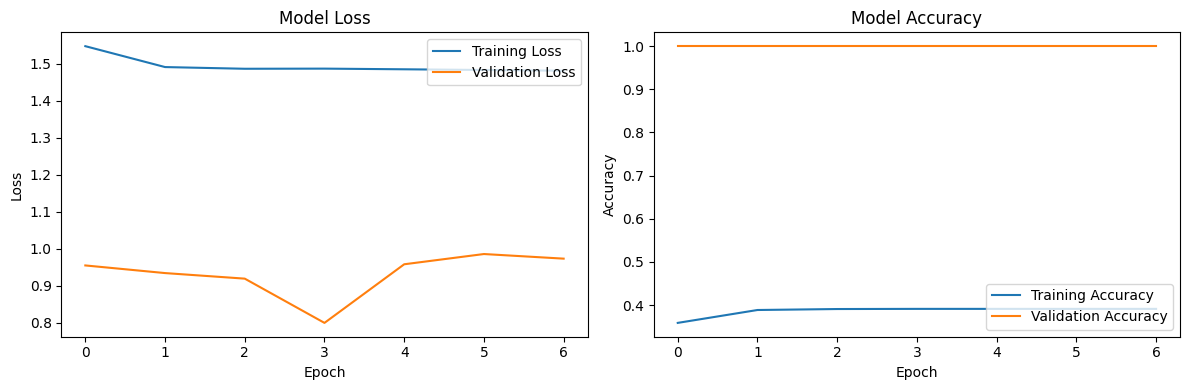

In [27]:
# Assuming model2_hist is the history object returned by model2.fit()
history2 = model2_hist.history

# Plotting the training and validation loss
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history2['loss'], label='Training Loss')
plt.plot(history2['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history2['accuracy'], label='Training Accuracy')
plt.plot(history2['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Show plots
plt.tight_layout()
plt.show()

# Model Evaluation

In [28]:
# Define a function to calculate F1 score
def f1_score(precision, recall):
    precision = precision.result().numpy()
    recall = recall.result().numpy()
    return 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())

In [29]:
# Initialize metrics for model1
pre1 = Precision()
re1 = Recall()
acc1 = CategoricalAccuracy()

# Initialize metrics for model2
pre2 = Precision()
re2 = Recall()
acc2 = CategoricalAccuracy()

# Iterate over the test dataset for model1
for batch in scaled_test_dataset.as_numpy_iterator(): 
    X, y = batch
    yhat1 = model1.predict(X)
    yhat1 = tf.argmax(yhat1, axis=1)  # Predicted class indices
    
    # Update metrics for model1
    pre1.update_state(y, yhat1)
    re1.update_state(y, yhat1)
    acc1.update_state(y, yhat1)

# Compute F1 score for model1
f1_model1 = f1_score(pre1, re1)

# Clear session again to free GPU memory
tf.keras.backend.clear_session()

# Iterate over the test dataset for model2
for batch in scaled_test_dataset.as_numpy_iterator(): 
    X, y = batch
    yhat2 = model2.predict(X)
    yhat2 = tf.argmax(yhat2, axis=1)  # Predicted class indices
    
    # Update metrics for model2
    pre2.update_state(y, yhat2)
    re2.update_state(y, yhat2)
    acc2.update_state(y, yhat2)

# Compute F1 score for model2
f1_model2 = f1_score(pre2, re2)

# Clear session again to free GPU memory
tf.keras.backend.clear_session()

1/1 [==============================] - 0s 24ms/step


In [30]:
# Print the results for model1
print(f"Model 1 - Precision: {pre1.result().numpy()}, Recall: {re1.result().numpy()}, Accuracy: {acc1.result().numpy()}, F1 Score: {f1_model1}")

Model 1 - Precision: 0.8983606696128845, Recall: 0.8712241649627686, Accuracy: 0.4576271176338196, F1 Score: 0.8845842842306859


In [31]:
# Print the results for model2
print(f"Model 2 - Precision: {pre2.result().numpy()}, Recall: {re2.result().numpy()}, Accuracy: {acc2.result().numpy()}, F1 Score: {f1_model2}")

Model 2 - Precision: 0.6684378385543823, Recall: 1.0, Accuracy: 0.9322034120559692, F1 Score: 0.801273841966876
